# **TWITTER SENTIMENT ANALYSIS - RAMÓN FERNÁNDEZ CEREZO**

### **1. Tweet scrapping**

#### **** DISCLAIMER: The cells in this first part are not executed in this Jupyter Notebook because the library requires a version of Python 3.8 or later, so I have executed them in Anaconda and copied them here so that the complete process is in this file.

- In the absence of a response from Twitter when requesting credentials to access the API, I have used the snscrape library, with which I have obtained all the necessary data.

In [1]:
!pip install snscrape

- Import the necessary libraries

In [1]:
import snscrape.modules.twitter as snstwitter
import pandas as pd

- Scraping the required tweets for analysis using the snstwitter module.

In [55]:
# A list is created and the data of each tweet is added to it using the append method.
tweets_list2 = []
# The TwitterSearchScraper function is used to obtain the tweets that mention @TheBridge_Tech within the selected dates.
for i,tweet in enumerate(snstwitter.TwitterSearchScraper('@TheBridge_Tech since:2022-11-21 until:2023-03-08').get_items()):
    # Date, tweet ID, username, content, user name, replies, retweets, likes, mentions, and user followers are obtained.
    tweets_list2.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.user.displayname,
                         tweet.user.id, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount,
                        tweet.user.followersCount])

- List is converted into a DataFrame

In [56]:
# A DataFrame is created using the data obtained in the same order as received in the previous cell.
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Displayname',
                                                'User Id', 'Replies', 'RT', 'Likes', 'Quotes', 'User Followers'])
tweets_df2.head(10)

,Datetime,Tweet Id,Text,Username,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers
0,2023-03-07 17:16:14+00:00,1633154604018876416,¡Hola #dataholics! La primavera trompetera se ...,DatabeerSVQ,DatabeerSVQ,936539844079218688,0,3,8,1,702
1,2023-03-06 15:36:30+00:00,1632767114380492803,¡Evento #desarrolloweb en #Sevilla con Diego F...,TheBridge_Tech,The Bridge,1162694149956603904,0,3,4,0,621
2,2023-03-06 14:13:44+00:00,1632746286133702658,¡Súper contentos de participar! Las temáticas ...,TheBridge_Tech,The Bridge,1162694149956603904,0,1,1,0,621
3,2023-03-06 10:38:30+00:00,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,0,0,0,0,15
4,2023-03-06 10:38:30+00:00,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,1,3,5,1,15
5,2023-03-06 08:48:56+00:00,1632664546665025536,"Encuentro de la @mlopscommunity en Madrid: ""ML...",nodosenlared,Mario Lopez de Avila,41545659,0,1,3,0,6273
6,2023-03-04 22:32:56+00:00,1632147141224275970,@nodosenlared @snowded @TheBridge_Tech Muy bue...,RoccoLozano,Valerio Rocco Lozano,925597948410580993,0,0,1,0,7648
7,2023-03-04 14:08:54+00:00,1632020293509083137,@PauMugarra @ToniDorta @TheBridge_Tech https:/...,joobid,"Jorge Ordovás (🌸, 🌿)",276656109,0,0,2,0,5134
8,2023-03-04 11:22:58+00:00,1631978537904222211,El meetup del jueves 9 de marzo con @ToniDorta...,PauMugarra,Pau Mugarra,1003872445,1,3,9,1,906
9,2023-03-03 15:13:49+00:00,1631674245896982528,Hoy me llegó esta estupenda mochila y unos gad...,OmarjLand,Omar Landaeta,763727449,0,0,0,0,124


- DataFrame is converted into a CSV in Anaconda to download it in VSC

In [57]:
tweets_df2.to_csv("Datos_Twitter_TheBridge.csv", index = False)

### **2. AWS Database connection**

Import the necessary libraries

In [389]:
import pymysql

The database is connected using its credentials:

In [390]:
username = "admin"
password = "Valentin234"
host = "database-1.c10by1rrbsdg.us-east-2.rds.amazonaws.com" 
port = 3306
db = pymysql.connect(host = host,
                     user = username,
                     password = password,
                     cursorclass = pymysql.cursors.DictCursor)

A cursor is created to execute the queries

In [391]:
crsr = db.cursor()

The database is created and accessed in order to create tables inside it

In [392]:
create_db = '''CREATE DATABASE TheBridgeTw'''
crsr.execute(create_db)

1

In [393]:
crsr.connection.commit()
use_db = ''' USE TheBridgeTw'''
crsr.execute(use_db)

0

It may be useful to have this query prepared in case we need to reset a table

In [492]:
# query = '''
# DROP TABLE Users
# '''
# crsr.execute(query)

0

Tweets table is created

In [460]:
query = '''
CREATE TABLE Tweets (
    datetime VARCHAR(128) NOT NULL,
    tweetid INTEGER,
    userid INTEGER,
    content VARCHAR(1024) NOT NULL,
    quotes INTEGER,
    replies INTEGER,
    RT INTEGER,
    Likes INTEGER
)
'''
crsr.execute(query)

0

And the users table with userid as the common column is created

In [493]:
query = '''
CREATE TABLE Users (
    userid INT(64),
    username VARCHAR(256) NOT NULL,
    displayname VARCHAR(256) NOT NULL,
    userfollowers INT(32)
)
'''
crsr.execute(query)

0

The original data is downloaded again to upload it as is, before processing, but the process can be repeated at the end

In [405]:
tweets2 = pd.read_csv('Datos_Twitter_TheBridge.xls')

In [408]:
tweets2.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Displayname', 'User Id',
       'Replies', 'RT', 'Likes', 'Quotes', 'User Followers'],
      dtype='object')

The dataframes are created and inserted into their respective tables.

In [495]:
A = tweets2[['Datetime', 'Tweet Id', 'User Id', 'Text', 'Quotes', 'Replies', 'RT', 'Likes']]
B = tweets2[['User Id', 'Username', 'Displayname', 'User Followers']].drop_duplicates()

In [463]:
query = "INSERT INTO Tweets (datetime, tweetid, userid, content, quotes, replies, RT, Likes) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
crsr.executemany(query, A.values.tolist())


176

In [496]:
query = "INSERT INTO Users (userid, username, displayname, userfollowers) VALUES (%s,%s,%s,%s)"
crsr.executemany(query, B.values.tolist())

58

IMPORTANT: Commit the changes and close the connection

In [497]:
db.commit()
db.close()

### **3. Exploratory Data Analysis**

- Import the necessary libraries for data visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tweets = pd.read_csv('Datos_Twitter_TheBridge.xls')
tweets

,Datetime,Tweet Id,Text,Username,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers
0,2023-03-07 17:16:14+00:00,1633154604018876416,¡Hola #dataholics! La primavera trompetera se ...,DatabeerSVQ,DatabeerSVQ,936539844079218688,0,3,8,1,702
1,2023-03-06 15:36:30+00:00,1632767114380492803,¡Evento #desarrolloweb en #Sevilla con Diego F...,TheBridge_Tech,The Bridge,1162694149956603904,0,3,4,0,621
2,2023-03-06 14:13:44+00:00,1632746286133702658,¡Súper contentos de participar! Las temáticas ...,TheBridge_Tech,The Bridge,1162694149956603904,0,1,1,0,621
3,2023-03-06 10:38:30+00:00,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,0,0,0,0,15
4,2023-03-06 10:38:30+00:00,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,1,3,5,1,15
...,...,...,...,...,...,...,...,...,...,...,...
171,2022-11-23 10:13:36+00:00,1595359906747617280,¡Ven a conocer los BBK bootcamps powered by @T...,TheBridge_Tech,The Bridge,1162694149956603904,0,4,3,0,621
172,2022-11-22 08:46:53+00:00,1594975696614526979,@HoplaSoftware Deseando teneros @HoplaSoftware...,TheBridge_Tech,The Bridge,1162694149956603904,0,0,1,0,621
173,2022-11-22 08:18:42+00:00,1594968601265586178,Acelerando juntos el #talentodigital en España...,HoplaSoftware,Hopla! Software,783248945761910788,1,1,3,0,278
174,2022-11-22 08:05:10+00:00,1594965197613322241,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,1,2,0,1847


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        176 non-null    object
 1   Tweet Id        176 non-null    int64 
 2   Text            176 non-null    object
 3   Username        176 non-null    object
 4   Displayname     176 non-null    object
 5   User Id         176 non-null    int64 
 6   Replies         176 non-null    int64 
 7   RT              176 non-null    int64 
 8   Likes           176 non-null    int64 
 9   Quotes          176 non-null    int64 
 10  User Followers  176 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 15.2+ KB


In [5]:
tweets.describe()

,Tweet Id,User Id,Replies,RT,Likes,Quotes,User Followers
count,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.612328e+18,6.227048e+17,0.261364,1.647727,5.022727,0.142045,3899.642045
std,1.120226e+16,5.713920e+17,0.724972,3.917841,24.287552,0.498276,7484.395761
min,1.594964e+18,7.154412e+06,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.600009e+18,8.409891e+08,0.000000,0.000000,1.000000,0.000000,621.000000
50%,1.614612e+18,7.020774e+17,0.000000,1.000000,2.500000,0.000000,957.500000
75%,1.620453e+18,1.162694e+18,0.000000,2.000000,4.000000,0.000000,3235.000000
max,1.633155e+18,1.610074e+18,7.000000,49.000000,322.000000,4.000000,39676.000000


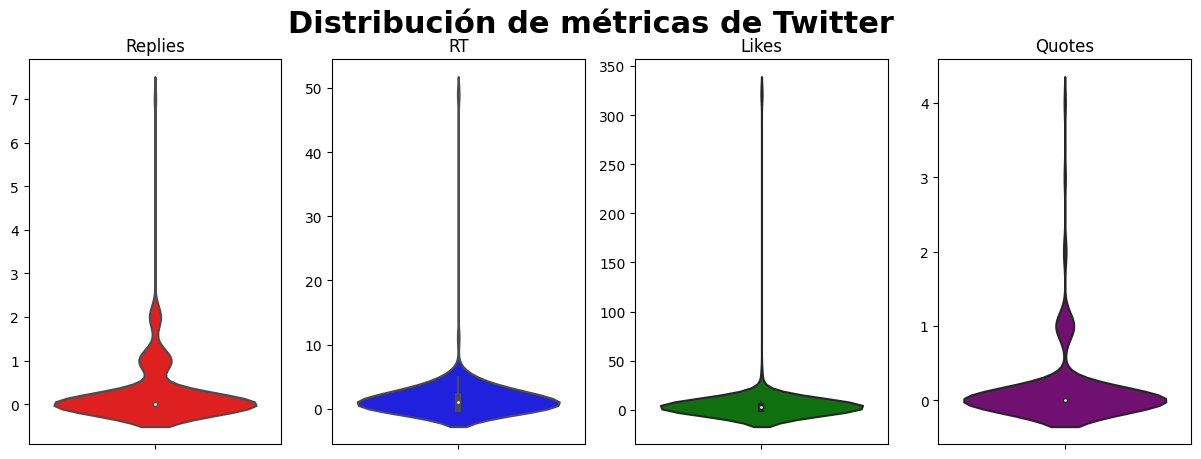

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # Create 4 subplots


sns.violinplot(data=tweets.Replies, ax=axs[0], color='red')
axs[0].set_title("Replies")
axs[0].set_xticklabels([])
sns.violinplot(data=tweets.RT, ax=axs[1], color='blue')
axs[1].set_title("RT")
axs[1].set_xticklabels([])
sns.violinplot(data=tweets.Likes, ax=axs[2], color='green')
axs[2].set_title("Likes")
axs[2].set_xticklabels([])
sns.violinplot(data=tweets.Quotes, ax=axs[3], color='purple')
axs[3].set_title("Quotes")
axs[3].set_xticklabels([])

fig.suptitle("Distribution of Twitter metrics", fontsize=22, fontweight='bold')

plt.show()

It can be observed that the data is clustered around 0, indicating low engagement as the norm. However, there are outliers that represent tweets that have performed exceptionally well.

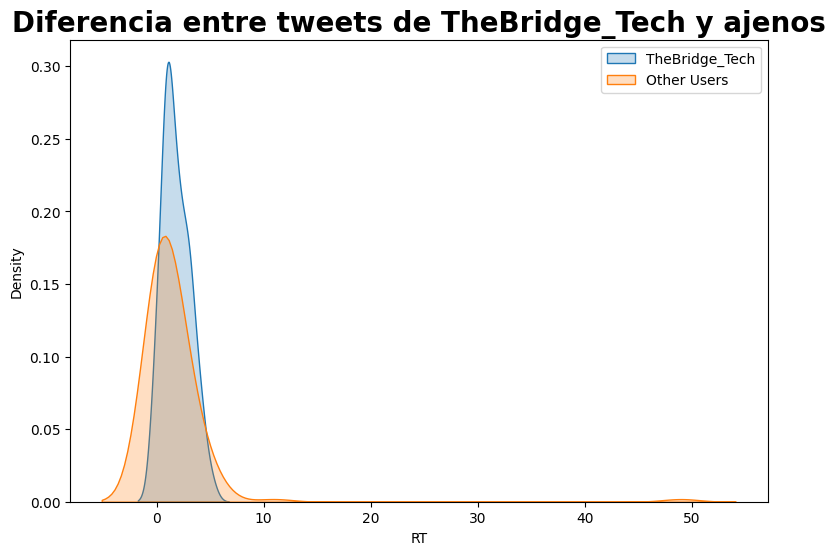

In [76]:
plt.figure(figsize=(9,6))
plt.title('Difference between tweets from TheBridge_Tech and tweets from others', fontsize=20, fontweight='bold')
sns.kdeplot(data=tweets[tweets['Username'] == 'TheBridge_Tech']['RT'], fill=True, label='TheBridge_Tech')
sns.kdeplot(data=tweets[tweets['Username'] != 'TheBridge_Tech']['RT'], fill=True, label='Other Users')
plt.legend()
plt.show()

The tweets from TheBridge_Tech account tend to have a very low number of retweets, as do tweets from other accounts. However, there are two or three exceptions to this trend

#### 3. 1. What is the tweet with the highest social impact?

In [83]:
tweets[tweets['RT'] == tweets['RT'].max()]

,Datetime,Tweet Id,Text,Username,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers
88,2023-01-15 13:16:23+00:00,1614612463361695747,"Advanced #Cynefin, Estuarine mapping &amp; EUF...",nodosenlared,Mario Lopez de Avila,41545659,7,49,322,4,6273


The tweet with the highest social impact is from Mario López de Ávila on January 15th of this year, announcing a talk by a very important profile that will take place the following week, on March 16th. Its impact is mainly due to the speaker's significance, with TheBridge's role as event hosts being somewhat secondary in the tweet. It is worth noting that the entry fee for the event is almost €800.

#### 3.2. What is the user that mentions the school the most?

In [95]:
tweets.groupby(['Username']).count().sort_values(by='Likes',ascending=False).head(5)

,Datetime,Tweet Id,Text,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers
Username,,,,,,,,,,
TheBridge_Tech,47,47,47,47,47,47,47,47,47,47
BBK_eus,22,22,22,22,22,22,22,22,22,22
jorgegrev,11,11,11,11,11,11,11,11,11,11
PauMugarra,4,4,4,4,4,4,4,4,4,4
Recuenco,4,4,4,4,4,4,4,4,4,4


In [96]:
tweets[tweets['Username']== 'BBK_eus']

,Datetime,Tweet Id,Text,Username,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers
131,2022-12-06 10:00:16+00:00,1600067592143740931,En la presentación de los nuevos #BBKBootcamps...,BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,1,3,0,1847
134,2022-12-05 14:00:20+00:00,1599765621025169409,Tras la presentación de la nueva edición de #B...,BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,2,7,0,1847
138,2022-12-01 16:54:08+00:00,1598359807005802497,"Especial agradecimiento a @sarasola_nora, Dire...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,0,4,0,1847
139,2022-12-01 16:01:03+00:00,1598346448138956801,🔙 Atzo oso jardunaldi interesgarria izan genue...,BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,0,0,0,1847
140,2022-12-01 15:58:32+00:00,1598345815583608832,🔙 Ayer vivimos una jornada muy interesante en ...,BBK_eus,Fundación BBK | Obra Social,702077405045899264,1,2,3,0,1847
149,2022-11-30 09:45:27+00:00,1597889537627283456,"#BBKBootcamps | 🗣 Guillermo Dorronso, Manageme...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,3,5,3,1847
150,2022-11-30 09:45:04+00:00,1597889440789282817,Finaliza la jornada de presentación de la nuev...,BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,2,5,1,1847
151,2022-11-30 09:43:54+00:00,1597889145497653249,"#BBKBootcamps | 🗣 Ramón Lozano, director de te...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,2,4,1,1847
152,2022-11-30 09:33:32+00:00,1597886536896450562,"🗣 Tomás Iriondo, @ClusterGaia -ko CEO: ""#ETEar...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,1,3,0,1847
153,2022-11-30 09:32:30+00:00,1597886276056776704,"🗣 Tomás Iriondo, CEO de @ClusterGaia: ""Tenemos...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,3,4,0,1847


The user who mentions the school the most, excluding TheBridge_Tech's own tweets, is BBK_eus, a foundation focused on social cohesion and employment. They mentioned TheBridge_Tech 22 times, mostly with corporate messages and with low but not negligible engagement metrics

#### 3.3. In what month is the highest number of tweets concentrated?

In [188]:
import datetime
for i, a in enumerate(tweets['Datetime']):
    date = int(a[5:7])
    tweets.at[i, 'Meses'] = date
    tweets['Meses'].replace(3, 'Marzo', inplace=True)
    tweets['Meses'].replace(2, 'Febrero', inplace=True)
    tweets['Meses'].replace(1, 'Enero', inplace=True)
    tweets['Meses'].replace(12, 'Diciembre', inplace=True)
    tweets['Meses'].replace(11, 'Noviembre', inplace=True)

In [308]:
tweets.head()

,Datetime,Tweet Id,Text,Username,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers,Meses
0,2023-03-07 17:16:14+00:00,1633154604018876416,¡Hola #dataholics! La primavera trompetera se ...,DatabeerSVQ,DatabeerSVQ,936539844079218688,0,3,8,1,702,Marzo
1,2023-03-06 15:36:30+00:00,1632767114380492803,¡Evento #desarrolloweb en #Sevilla con Diego F...,TheBridge_Tech,The Bridge,1162694149956603904,0,3,4,0,621,Marzo
2,2023-03-06 14:13:44+00:00,1632746286133702658,¡Súper contentos de participar! Las temáticas ...,TheBridge_Tech,The Bridge,1162694149956603904,0,1,1,0,621,Marzo
3,2023-03-06 10:38:30+00:00,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,0,0,0,0,15,Marzo
4,2023-03-06 10:38:30+00:00,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,1,3,5,1,15,Marzo


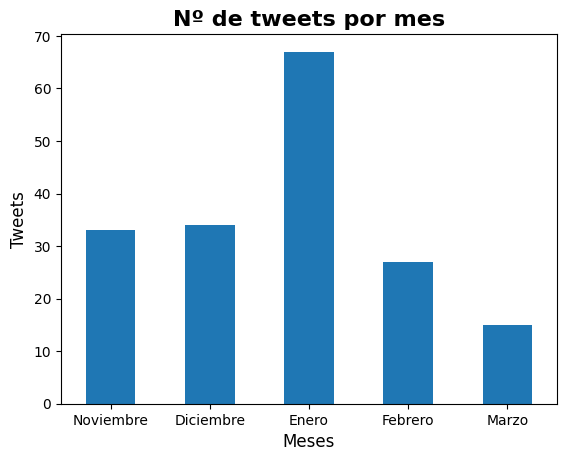

In [200]:
tweets.groupby('Meses')['Tweet Id'].count().reindex(['November', 'December', 'January', 'February', 'March']).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Tweets', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.title('Tweets per month', fontsize=16, fontweight='bold')
plt.show()

January had by far the most activity, more than double the next most active month, which was December

#### 3.4. What are the most frequent words?

In [283]:
y[:20].index

Index(['de', 'en', 'thebridge_tech', 'y', 'la', 'el', 'a', 'con', 'que', 'las',
       'los', 'te', 'un', 'digital', 'para', 'bootcamps', 'bbkbootcamps',
       'bbk_eus', 'del', 'bbk'],
      dtype='object')

In [294]:
from collections import Counter
import re

pattern = r"\b[a-zA-Z][\w']*"
words = re.findall(pattern, '_|,|.|?| |¿|!|¡'.join(tweets['Text']).lower())
words = [word for word in words if not re.match(r'^https?:\/\/.*[\r\n]*', word)]
y = pd.Series(words).value_counts()
y.drop(labels= ['https', 'co', 't'], inplace=True)
df = pd.DataFrame({'word': y[:20].index.tolist(), 'Times used':y[:20]})
df.reset_index(drop=True)

,palabra,Veces utilizada
0,de,271
1,en,173
2,thebridge_tech,132
3,y,115
4,la,113
5,el,102
6,a,96
7,con,62
8,que,50
9,las,49


The most commonly used words in mentions of TheBridge_tech are, unsurprisingly, the mentions themselves, as well as many prepositions, conjunctions, and articles. We begin to see really useful words towards the end of the top 20, such as "bootcamps" and "digital," as well as other companies mentioned such as "bbk," "bbkbootcamps," or "bbk_eus

In [319]:
import nltk
from nltk.corpus import stopwords

wordsfiltered = [word for word in words if word not in stopwords.words('spanish')]
A = pd.Series(wordsfiltered).value_counts()
A.drop(labels= ['https', 'co', 't'], inplace=True)
df = pd.DataFrame({'palabra': A[:20].index.tolist(), 'Veces utilizada':A[:20]})
df.reset_index(drop=True)

,palabra,Veces utilizada
0,thebridge_tech,132
1,digital,38
2,bootcamps,33
3,bbkbootcamps,33
4,bbk_eus,33
5,bbk,28
6,bootcamp,25
7,bbk_kuna,20
8,ciberseguridad,19
9,bilbao,18


Eliminating all these meaningless words, we find mainly words related to accounts, education (bootcamp, masterclass, career), locations (Bilbao and Madrid), and technology (development, digital, cybersecurity). Possibly the only word among these top 20 most used, and that the predictive algorithm surely takes into account, is "thanks", as a positive comment.

#### 3.5 ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

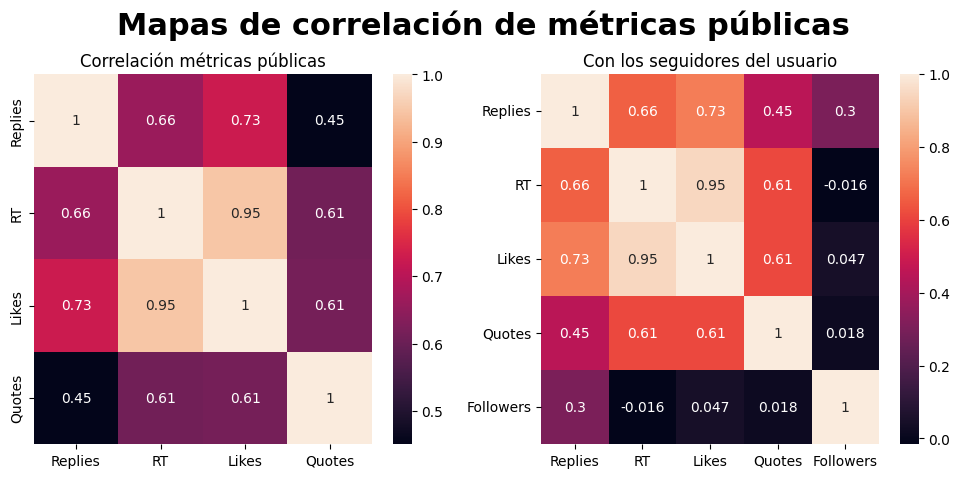

In [315]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(data=tweets[['Replies', 'RT', 'Likes', 'Quotes']].corr(), ax = axs[0], annot=True)
axs[0].set_title("Public metrics correlation")
sns.heatmap(data=tweets[['Replies', 'RT', 'Likes', 'Quotes', 'User Followers']].corr(), ax = axs[1], annot=True)
axs[1].set_title("with the users followers")
axs[1].set_xticklabels(['Replies', 'RT', 'Likes', 'Quotes', 'Followers'], rotation=0)
axs[1].set_yticklabels(['Replies', 'RT', 'Likes', 'Quotes', 'Followers'], rotation=0)

fig.suptitle("Correlation maps of public metrics", fontsize=22, fontweight= 'bold')
fig.subplots_adjust(top=0.85)

- We can see that the correlation between variables is very high between Retweets and likes of the publications, being lower between mentions and replies, although essentially in the case of mentions there are simply very few.

- On the other hand, we could understand that the more followers the accounts that refer to TheBridge have, the more interaction they will generate, but nothing could be further from the truth in the case of accounts that mention TheBridge, there is no correlation in this. **This could be because these followers are fake, excessively old, or simply the content lacks sufficient interest.**

#### 3.6. Have you drawn any additional conclusions from your analysis?

- The analyzed Twitter account is **mainly interacted with or mentioned by similar accounts**, all within the **digital employment industry**, as reflected in the words used in their tweets.

- Most of the studied tweets have **very low engagement numbers with the audience**, with most Twitter metrics approaching 0, indicating room for improvement in this area.

- The **tweets in general are positive or neutral**, mainly used to announce events.

- Other companies in the sector, such as IronHackSpain, have more followers than TheBridge_Tech, but they are not taking good care of their social media, which is very close to inactivity. However, as this study is only focused on Twitter, we cannot know for sure, but we can assume that they have prioritized other social media platforms, as both the Spanish and English-speaking accounts are almost inactive.

### **4. Prediction model**

In [340]:
import warnings
warnings.filterwarnings("ignore")

#### 4.1. What are the predictions? Interpret the results

- Data Preprocessing: language

It is worth noting that some of the tweets included in this study originated from the BBK bank, which is why certain tweets are written in Basque. However, for the purpose of this study, we will only analyze tweets in Spanish. In order to do so, it will be necessary to download the langdetect library.

In [329]:
!pip install langdetect

And a new column will be created with the updated data. The Basque language may not be recognized as such, but it can be differentiated from Spanish

In [341]:
from langdetect import detect, DetectorFactory
tweets['Language'] = 0
DetectorFactory.seed = 0
for i, text in enumerate(tweets['Text']):
    tweets['Language'][i] = detect(text)
tweets

,Datetime,Tweet Id,Text,Username,Displayname,User Id,Replies,RT,Likes,Quotes,User Followers,Meses,Language
0,2023-03-07 17:16:14+00:00,1633154604018876416,¡Hola #dataholics! La primavera trompetera se ...,DatabeerSVQ,DatabeerSVQ,936539844079218688,0,3,8,1,702,Marzo,es
1,2023-03-06 15:36:30+00:00,1632767114380492803,¡Evento #desarrolloweb en #Sevilla con Diego F...,TheBridge_Tech,The Bridge,1162694149956603904,0,3,4,0,621,Marzo,es
2,2023-03-06 14:13:44+00:00,1632746286133702658,¡Súper contentos de participar! Las temáticas ...,TheBridge_Tech,The Bridge,1162694149956603904,0,1,1,0,621,Marzo,es
3,2023-03-06 10:38:30+00:00,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,0,0,0,0,15,Marzo,es
4,2023-03-06 10:38:30+00:00,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,ESOLIUPO,Asociación de Estudiantes de Software Libre UPO,1585726199485140993,1,3,5,1,15,Marzo,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2022-11-23 10:13:36+00:00,1595359906747617280,¡Ven a conocer los BBK bootcamps powered by @T...,TheBridge_Tech,The Bridge,1162694149956603904,0,4,3,0,621,Noviembre,es
172,2022-11-22 08:46:53+00:00,1594975696614526979,@HoplaSoftware Deseando teneros @HoplaSoftware...,TheBridge_Tech,The Bridge,1162694149956603904,0,0,1,0,621,Noviembre,es
173,2022-11-22 08:18:42+00:00,1594968601265586178,Acelerando juntos el #talentodigital en España...,HoplaSoftware,Hopla! Software,783248945761910788,1,1,3,0,278,Noviembre,es
174,2022-11-22 08:05:10+00:00,1594965197613322241,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",BBK_eus,Fundación BBK | Obra Social,702077405045899264,0,1,2,0,1847,Noviembre,id


- The links found in many of the tweets were removed

In [342]:
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

tweets['Text'] = tweets['Text'].apply(remove_links)

- Additionally, the different punctuation marks were removed to make the text as flat as possible

In [381]:
signos = re.compile("(\_)|(\#)|(\¡)|(\¿)|(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

tweets['Text'] = tweets['Text'].apply(signs_tweets)

- Emojis are eliminated with the library demoji

In [358]:
!pip install demoji

     ---------------------------------------- 42.9/42.9 kB 1.1 MB/s eta 0:00:00


In [359]:
import demoji

tweets['Text'] = tweets['Text'].apply(lambda x: demoji.replace(x, ''))

- Stopwords are eliminated

In [382]:
def remove_stopwords(dfr):
    return " ".join([word for word in dfr.split() if word not in stopwords.words('spanish')])
tweets['Text'] = tweets['Text'].apply(remove_stopwords)

- The stemmer was applied to extract the roots of the words

In [372]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

tweets['Text'] = tweets['Text'].apply(spanish_stemmer)

- The model is imported using Pickle and is used to make predictions on the tweets in Spanish

In [373]:
import pickle

loaded_model = pickle.load(open('sentiment_model', 'rb'))
result = loaded_model.predict(tweets['Text'][tweets['Language']== 'es'])
print(result)

[0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0]


After analyzing a significant number of tweets, the person who wrote the message believes that the model worked better before applying the stemmer. However, since there was no appropriate comparison result available, they will rely on the current model. According to the analysis, the majority of the tweets are classified as positive (if the model used was from the Twitter Sentiment Analysis exercise, positive polarity is represented by the number 0). Specifically, out of 146 tweets analyzed, **109 were classified as positive and 37 as negative**.

### 4.2. What are the most important variables in the model?

In [385]:
import eli5
eli5.show_weights(loaded_model, top=10, feature_filter=lambda x: x != '<BIAS>', include_styles=False)

It may sound strange, but since the numbers are reversed (an issue inherited from the imported model), the words that move towards negativity are actually from tweets with positive sentiment, such as 'encant', 'enhorabuena', 'graci', 'feliz'; while 'cuent', 'deficit', 'blanc', 'muert' are the ones that push the prediction towards 1, meaning a negative sentiment prediction.

### 4.3 How could the model be improved?

- The first step would be to logically switch the labels (0 for negative and 1 for positive) before training the model.
- Afterwards, one could train the model by grouping words into n-grams of two or three words, or use other models such as SVM while replacing the Stemmer with a Lemmatizer.
- Training the model with more data, especially in the field of technology, could also be helpful in improving contextual understanding.

### 4.4. In what other opportunities could other ML models be applied, in your opinion?

- One opportunity could be to study the accounts that will be collaborated with. This could involve analyzing the impact of a mention based on metrics such as followers, typical interaction of that account, comments, public image, etc. This way, it might be possible to identify accounts from the world of technology, programming, marketing, etc., that currently have a greater media projection and directly seek to collaborate with them. There are currently many influencers in these areas on various social media platforms.

- If not interested in collaborating with the accounts mentioned in the previous point, at least we could analyze their tweets to find the topics that generate the most impact and have the best reception among the audience, using a Natural Language Processing model.

- In this case, we have worked with direct mentions to TheBridge_Tech, but not with responses to tweets, which would eliminate all the corporate tweets seen in the current tweets.